## Making datasets for each of the restriction levels
1. State lockdown + regional restrictions (i.e. early 2020)
2. State lockdown (i.e. until Mar 2022)
3. Free to move (i.e. from Mar 2022)

In [1]:
# Import those libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from numpy import genfromtxt
import matplotlib.image as mpimg
import pandas as pd
import scipy
import time
from operator import add
from scipy.stats import binom
from numpy import random
from joblib import Parallel, delayed
import collections
import csv

In [2]:
# Read in all weekly adjacnecy matrices, assigning each entry to a dictionary.
st = os.listdir("/Volumes/HardDrive/New_Workflow/symm_stoc_48")

stoch = []
for i in st:
    if '._' not in i:
        stoch.append(i)
        
d = {}
for i in range(len(stoch)):
    d[str(i)] = pd.read_csv("/Volumes/HardDrive/New_Workflow/symm_stoc_48/"+stoch[i], header = None, sep =',')

In [4]:
weeks = len(d)

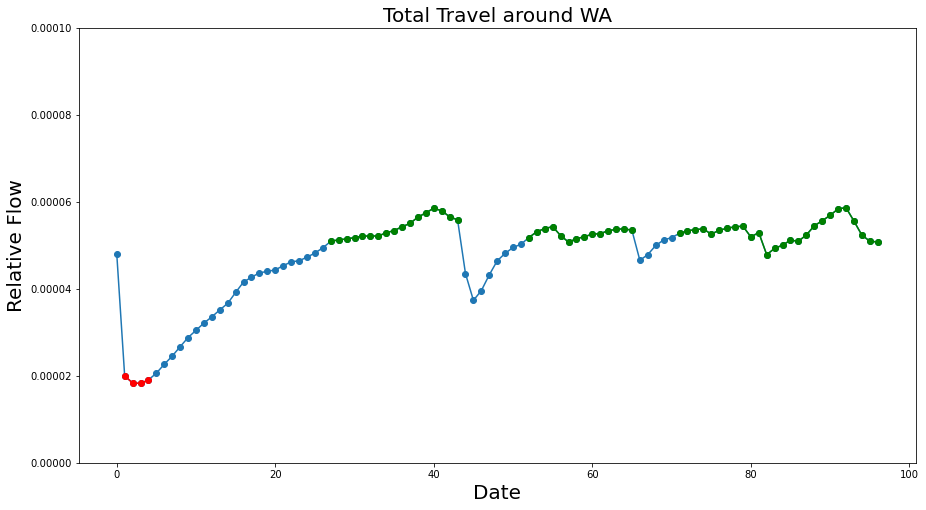

In [14]:
summ = []
for i in range(weeks):
    a = 0
    for j in d[str(i)].values.tolist():
        for k in j:
            a += k
    summ.append(a)
plt.figure(figsize = (15,8))
plt.plot(summ, marker = 'o')
plt.title('Total Travel around WA',fontsize = 20)
plt.ylim(0,0.0001)
plt.ylabel('Relative Flow', fontsize = 20)
#plt.xticks([i for i in range(len(weekdates))],months,rotation = 90,fontsize = 10)
plt.xlabel('Date', fontsize = 20)
plt.plot([i for i in range(1,5)], summ[1:5],marker = 'o', color = 'red')
plt.plot([i for i in range(27,44)], summ[27:44], marker = 'o', color = 'green')
plt.plot([i for i in range(52,66)], summ[52:66], marker = 'o', color = 'green')
plt.plot([i for i in range(71,97)], summ[71:97], marker = 'o', color = 'green')

So take weeks 2 to 5 for the regional restriction part,

for only state lockdown, take the green range

In [21]:
# Regional restrictions
df = d['1'].copy()
for i in range(2,5):
    df += d[str(i)]
df = df/4
df.to_csv("/Volumes/HardDrive/New_Workflow/restrictions/level_1.csv",sep = ',',index = False, header = False)

In [23]:
a = 0
for j in df.values.tolist():
    for k in j:
        a += k
print(a)

1.891375949637116e-05


In [27]:
# Only state lockdown
days = [i for i in range(27,44)]+ [i for i in range(52,66)]+ [i for i in range(71,97)]
df = d['27'].copy()
for i in days[1:]:
    df += d[str(i)]
df = df/len(days)
df.to_csv("/Volumes/HardDrive/New_Workflow/restrictions/level_2.csv",sep = ',',index = False, header = False)

In [28]:
a = 0
for j in df.values.tolist():
    for k in j:
        a += k
print(a)

5.3373956213439794e-05
